## Model description

See the wikipedia entry [Lotka-Volterra equations](https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations).

The model description is taken from [this resource](https://ths.rwth-aachen.de/research/projects/hypro/lotka-volterra/).

The 2-dimensional Lotka-Volterra system depicts the populations change of a class of predators and a class of
preys. The growth rate of preys’ population $x$ over time is given by 

$$
\dot{x} = x\cdot (\alpha - \beta \cdot y)
$$
wherein  $\alpha, \beta$ are constant parameters and $y$ is the population of predators.

It gives that the number of preys grows exponentially without predation.

The population growth of predators is governed by the differential equation

$$
\dot{y} = -y\cdot (\gamma - \delta\cdot x)
$$
wherein  $\gamma, \delta$ are constant parameters. 

We set those parameters as  $\alpha = 1.5 ,  \beta = 1 ,  \gamma = 3$  and  $\delta = 1$.


In [1]:
using Reachability, TaylorIntegration, MathematicalSystems

┌ Info: Recompiling stale cache file /home/mforets/.julia/compiled/v1.2/Reachability/CHV4V.ji for Reachability [774a0091-654f-5c65-bbdc-ad5b67b45832]
└ @ Base loading.jl:1240


In [2]:
@taylorize function lotka_volterra!(du, u, p, t)
    local α, β, γ, δ = 1.5, 1.0, 3.0, 1.0
    du[1] = u[1] * (α - β*u[2])
    du[2] = -u[2] * (γ - δ*u[1])
    return du
end

## Reachability settings

We consider the initial set  $x\in [4.8,5.2], y \in [1.8,2.2]$.

In [3]:
Xo = Hyperrectangle(low=[4.8, 1.8], high=[5.2, 2.2]);

In [4]:
S = BlackBoxContinuousSystem(lotka_volterra!, 2)
P = InitialValueProblem(S, Xo);

## Results

We compute the flowpipe using the TMJets algorithm for the time horizon $[0,5]$:

In [5]:
sol = solve(P, Options(:T=>5.0),
               op=TMJets(Options(:max_steps=>1_000, :orderT=>8, :orderQ=>2,:output_type=>Zonotope)));

In [6]:
using Plots, LaTeXStrings
gr()

Plots.GRBackend()

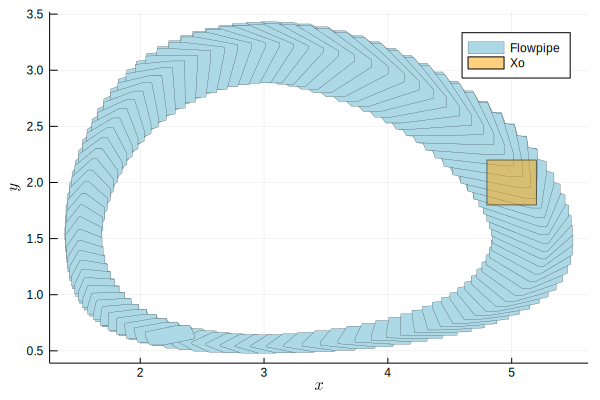

In [7]:
plot(sol, xlab=L"x", ylab=L"y", lw=0.2, color=:lightblue, lab="Flowpipe")
plot!(Xo, color=:orange, lab="Xo")

In [8]:
# animated flowpipe
plot(Xo, color=:orange, lab="")

anim = @animate for (i, x) in enumerate(sol.Xk)
    segmento = [set(sol.Xk[k]) for k in 1:i]
    plot!(segmento, xlim=(1.0, 6.0), ylim=(0.0, 3.5), xlab=L"x", ylab=L"y",
          lw=0.2, color=:lightblue, lab="", dpi=200)
    plot!(Xo, color=:orange, lab="")
end

gif(anim, "LotkaVolterra.gif", fps=15)

┌ Info: Saved animation to 
│   fn = /home/mforets/Notebooks/LotkaVolterra.gif
└ @ Plots /home/mforets/.julia/packages/Plots/Iuc9S/src/animation.jl:95


Plots.AnimatedGif("/home/mforets/Notebooks/LotkaVolterra.gif")